# NLP project - Glassdoor analysis
This notebook is a continuation of the previous notebook. Here we will read the data obtained after scraping reviews from Glassdoor.

## 1. Import libraries and functions
First, the libraries will be imported and configured if needed.

In [1]:
# Import pandas
import pandas as pd

# Import sentence transformers
from sentence_transformers import SentenceTransformer # pip install -U sentence-transformers

# Import numpy
import numpy as np

# Import matplotlib
from matplotlib import pyplot as plt

# Import nltk sentiment intensity analyser
from nltk.sentiment import SentimentIntensityAnalyzer

# Configure pandas
pd.set_option('display.max_columns', 500)

A cosine similarity function between vectors will be created.

In [2]:
def cosine_similarity(a, b):
    """
    This function takes in two numpy vectors and returns their cosine similarity.
    """
    
    dot = np.dot(a, b)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
    cos = dot / (norma * normb)
    return cos

A plotter for pandas dataframe will be created

In [3]:
def highlight_near_mean(val, col_mean, threshold=0.3):
    color = 'black' if val > col_mean else 'white'
    alpha = min(abs(val - col_mean) / threshold, 1)
    return 'background-color: %s; opacity: %f' % (color, alpha)

A categoriser for the sentiment labels.

In [4]:
def sentiment_label(score):
    """
    This function takes in a sentiment score, and categorises it into one of the 5 categories.
    """
    
    if score >= 0.75:
        return 'Strongly Positive'
    elif score >= 0.25:
        return 'Positive'
    elif score > -0.25:
        return 'Neutral'
    elif score > -0.75:
        return 'Negative'
    else:
        return 'Strongly Negative'

## 2. Read data
As mentioned before, the data was obtained by scraping Glassdoor. It will be read in directly.

In [5]:
# Read csv file
df = pd.read_csv("final_reviews.csv")

# Show head
df.head()

,review_id,summary,date,job_title,overall_rating,pros,cons,Industry,Company
0,empReview_72841993,Good place to start your career,-,-,5.0,Fun culture for the ACs,"Long hours, don’t see your work through due to...",Consulting,Bain & Company
1,empReview_72790395,Good support. Fast growth opportunities,-,-,5.0,Great learning and teaming. Experience also hi...,"Bc experience is so dependent on case/client, ...",Consulting,Bain & Company
2,empReview_72724930,Love it!,-,-,5.0,Great place! I feel supported and have opportu...,Not many. WLB can be tricky,Consulting,Bain & Company
3,empReview_72671934,Great firm!,-,-,5.0,Great all around experience at the firm. Stron...,"As in all professional services jobs, work lif...",Consulting,Bain & Company
4,empReview_72465515,Great,-,-,5.0,The Best place to work,Longer hours at times on some cases,Consulting,Bain & Company


## 3. Sentiment analysis

First, a brief sentiment analysis will be done on the pros and cons, just to make sure that the users have a positive sentiment about the pros, and a negative sentiment about the cons.

Nltk's Sentiment Intensity Analyzer will be used on the pros, cons and summary.

In [6]:
# Initializing the SentimentIntensityAnalyzer from nltk
sia = SentimentIntensityAnalyzer()

# Defining a function to compute sentiment scores for the given text
def sentiment_score(text):
    return sia.polarity_scores(str(text))["compound"]

# Computing sentiment scores for the summary, pros and cons
df["summary_sentiment"] = df["summary"].apply(sentiment_score)
df["pros_sentiment"] = df["pros"].apply(sentiment_score)
df["cons_sentiment"] = df["cons"].apply(sentiment_score)

# Display head of dataframe
df.head()

,review_id,summary,date,job_title,overall_rating,pros,cons,Industry,Company,summary_sentiment,pros_sentiment,cons_sentiment
0,empReview_72841993,Good place to start your career,-,-,5.0,Fun culture for the ACs,"Long hours, don’t see your work through due to...",Consulting,Bain & Company,0.4404,0.5106,0.0000
1,empReview_72790395,Good support. Fast growth opportunities,-,-,5.0,Great learning and teaming. Experience also hi...,"Bc experience is so dependent on case/client, ...",Consulting,Bain & Company,0.8689,0.6249,-0.4520
2,empReview_72724930,Love it!,-,-,5.0,Great place! I feel supported and have opportu...,Not many. WLB can be tricky,Consulting,Bain & Company,0.6696,0.8516,-0.1531
3,empReview_72671934,Great firm!,-,-,5.0,Great all around experience at the firm. Stron...,"As in all professional services jobs, work lif...",Consulting,Bain & Company,0.6588,0.9523,-0.0772
4,empReview_72465515,Great,-,-,5.0,The Best place to work,Longer hours at times on some cases,Consulting,Bain & Company,0.6249,0.6369,0.0000


Having this, the sentiment scores will be categorised into 5 categories: (strongly) positive, (strongly) negative and neutral.

In [7]:
# Getting labels for each sentiment
df["summary_sentiment_label"] = df["summary_sentiment"].apply(sentiment_label)
df["pros_sentiment_label"] = df["pros_sentiment"].apply(sentiment_label)
df["cons_sentiment_label"] = df["cons_sentiment"].apply(sentiment_label)

# Display head for reference
df.head()

,review_id,summary,date,job_title,overall_rating,pros,cons,Industry,Company,summary_sentiment,pros_sentiment,cons_sentiment,summary_sentiment_label,pros_sentiment_label,cons_sentiment_label
0,empReview_72841993,Good place to start your career,-,-,5.0,Fun culture for the ACs,"Long hours, don’t see your work through due to...",Consulting,Bain & Company,0.4404,0.5106,0.0000,Positive,Positive,Neutral
1,empReview_72790395,Good support. Fast growth opportunities,-,-,5.0,Great learning and teaming. Experience also hi...,"Bc experience is so dependent on case/client, ...",Consulting,Bain & Company,0.8689,0.6249,-0.4520,Strongly Positive,Positive,Negative
2,empReview_72724930,Love it!,-,-,5.0,Great place! I feel supported and have opportu...,Not many. WLB can be tricky,Consulting,Bain & Company,0.6696,0.8516,-0.1531,Positive,Strongly Positive,Neutral
3,empReview_72671934,Great firm!,-,-,5.0,Great all around experience at the firm. Stron...,"As in all professional services jobs, work lif...",Consulting,Bain & Company,0.6588,0.9523,-0.0772,Positive,Strongly Positive,Neutral
4,empReview_72465515,Great,-,-,5.0,The Best place to work,Longer hours at times on some cases,Consulting,Bain & Company,0.6249,0.6369,0.0000,Positive,Positive,Neutral


Lastly, we will plot the three distributions (pros, cons and summary).

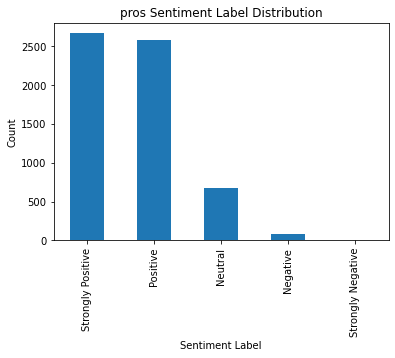

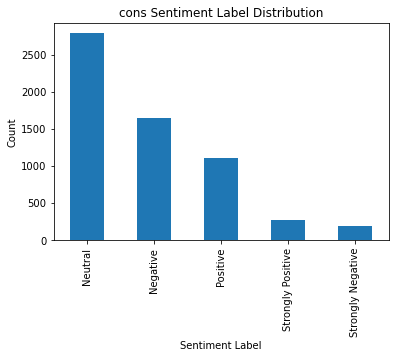

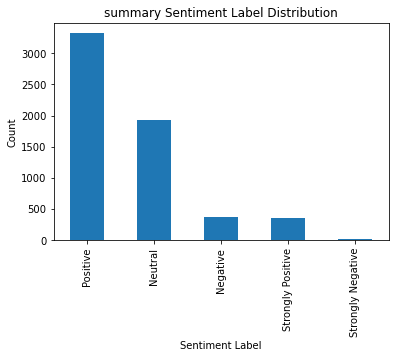

In [8]:
# Plotting the distributions of sentiment labels
for col in ['pros', 'cons', 'summary']:
    
    # Create plot
    df[col + '_sentiment_label'].value_counts().plot(kind='bar')
    
    # Add title and axes
    plt.title(col + " Sentiment Label Distribution")
    plt.xlabel("Sentiment Label")
    plt.ylabel("Count")
    
    # Show plot
    plt.show()

It's interesting to note that in the pros, most reviews are positive or strongly positive. In the cons, are either neutral or negative.

## 4. Get similarity
In this section, the similarity between each review and the different dimensions of work-life balance will be calculated. As a quick summary, the steps followed were:
   - Get embeddings of pros and cons of each review
   - Charachterise different dimensions of work-life balance
   - Get embeddings of each dimension obtained above
   - Calculate similarity between each dimension and review
   
### 4.1. Review embedding
The model used will be Bert, as outlined here: https://www.sbert.net/

First, the model will be loaded.

In [9]:
# Download model
model = SentenceTransformer('all-MiniLM-L6-v2')

Having this, the embeddings for each review will be obtained.

In [10]:
# Get pros embedding
df['pros_emb'] = df['pros'].apply(model.encode)

# Get cons embedding
df['cons_emb'] = df['cons'].apply(model.encode)

The head of the dataset will be shown as a reference

In [11]:
# Display head
df.head()

,review_id,summary,date,job_title,overall_rating,pros,cons,Industry,Company,summary_sentiment,pros_sentiment,cons_sentiment,summary_sentiment_label,pros_sentiment_label,cons_sentiment_label,pros_emb,cons_emb
0,empReview_72841993,Good place to start your career,-,-,5.0,Fun culture for the ACs,"Long hours, don’t see your work through due to...",Consulting,Bain & Company,0.4404,0.5106,0.0000,Positive,Positive,Neutral,"[-0.021549674, 0.028070798, -0.070952974, 0.04...","[-0.00984388, 0.0328718, 0.022806931, 0.006204..."
1,empReview_72790395,Good support. Fast growth opportunities,-,-,5.0,Great learning and teaming. Experience also hi...,"Bc experience is so dependent on case/client, ...",Consulting,Bain & Company,0.8689,0.6249,-0.4520,Strongly Positive,Positive,Negative,"[0.0056291227, 0.034200996, 0.0034077344, -0.0...","[-0.03681142, -0.009099124, 0.0063164104, -0.0..."
2,empReview_72724930,Love it!,-,-,5.0,Great place! I feel supported and have opportu...,Not many. WLB can be tricky,Consulting,Bain & Company,0.6696,0.8516,-0.1531,Positive,Strongly Positive,Neutral,"[0.057827603, -0.03814142, 0.05525159, -0.0064...","[-0.017056823, -0.041302666, -0.07058014, 0.05..."
3,empReview_72671934,Great firm!,-,-,5.0,Great all around experience at the firm. Stron...,"As in all professional services jobs, work lif...",Consulting,Bain & Company,0.6588,0.9523,-0.0772,Positive,Strongly Positive,Neutral,"[0.0014057755, -0.022726195, -0.0002993373, -0...","[-0.084008254, -0.03044542, 0.003368707, -0.01..."
4,empReview_72465515,Great,-,-,5.0,The Best place to work,Longer hours at times on some cases,Consulting,Bain & Company,0.6249,0.6369,0.0000,Positive,Positive,Neutral,"[-0.00028054064, -0.028407793, 0.038053576, 0....","[0.028229037, 0.05615061, 0.06734993, -0.01959..."


### 4.2. Work-life balance dimensions
The different dimensions of work-life balance and their characterisation sentences are the following:
 - Adequate leisure time: "I have enough free time to do the things I enjoy outside of work."
 - Flexibility: "I can adjust my work schedule to meet my personal needs."
 - Minimal stress: "My work-life balance helps me feel less stressed and more relaxed."
 - Clear boundaries: "I am able to clearly separate my work and personal life, without feeling like I'm always on call for work."
 - Satisfaction: "I feel fulfilled and content with both my professional and personal life."
 - Health: "My work-life balance supports my physical and mental well-being, rather than detracting from it."
 
Here, the positive aspect of each dimension is shown. A negative characterisation of each dimension was also used.

The external file on which this data was saved will be read.

In [12]:
# Read dimensions data
dimensions_wl = pd.read_csv("Dimensions_work_life.csv")

# Show dataset head
dimensions_wl.head()

,Dimension,Positive_sentence,Negative_sentence
0,Adequate leisure time,I have enough free time to do the things I enj...,I never have enough time for myself or to do t...
1,Flexibility,I can adjust my work schedule to meet my perso...,I have little control over my work schedule an...
2,Minimal stress,My work-life balance helps me feel less stress...,My work-life balance causes me a lot of stress...
3,Clear boundaries,I am able to clearly separate my work and pers...,"I am expected to be always available for work,..."
4,Satisfaction,I feel fulfilled and content with both my prof...,I feel unfulfilled and unsatisfied with either...


Having this, the embedding for each sentence will now be obtained.

In [13]:
# Positive embedding
dimensions_wl['Positive_sentence_emb'] = dimensions_wl['Positive_sentence'].apply(model.encode)

# Negative embedding
dimensions_wl['Negative_sentence_emb'] = dimensions_wl['Negative_sentence'].apply(model.encode)

# Show head as reference
dimensions_wl.head()

,Dimension,Positive_sentence,Negative_sentence,Positive_sentence_emb,Negative_sentence_emb
0,Adequate leisure time,I have enough free time to do the things I enj...,I never have enough time for myself or to do t...,"[0.0069295196, -0.039952382, 0.05369182, 0.039...","[0.04304911, -0.024106296, 0.029623678, 0.0647..."
1,Flexibility,I can adjust my work schedule to meet my perso...,I have little control over my work schedule an...,"[-0.076951936, -0.031718988, 0.013131952, 0.05...","[-0.03459638, -0.0073639895, -0.0053740237, 0...."
2,Minimal stress,My work-life balance helps me feel less stress...,My work-life balance causes me a lot of stress...,"[-0.012854286, 0.058011673, -0.015065918, 0.03...","[-0.00797305, 0.041571405, 0.003814705, 0.0452..."
3,Clear boundaries,I am able to clearly separate my work and pers...,"I am expected to be always available for work,...","[-0.096584626, -0.022980787, 0.043111823, 0.01...","[-0.026998037, -0.020032749, 0.05011851, 0.053..."
4,Satisfaction,I feel fulfilled and content with both my prof...,I feel unfulfilled and unsatisfied with either...,"[0.01392904, -0.005412812, 0.021778319, -0.021...","[-0.020388111, -0.012289754, 0.02371208, 0.047..."


### 4.3. Similarity calculation
Now the similarity between each pro and each positive characterisation of the dimensions will be calculated. The same process will be followed for negative characterisations and cons section of reviews.

In [14]:
# Iterate through dimensions
for dim, pos_emb, neg_emb in zip(dimensions_wl['Dimension'], dimensions_wl['Positive_sentence_emb'], dimensions_wl['Negative_sentence_emb']):
    
    # Calculate pro - positive similarity
    df[dim + '_pros_sim'] = df['pros_emb'].apply(lambda x: cosine_similarity(x, pos_emb))
    
    # Calculate con - negative similarity
    df[dim + '_cons_sim'] = df['cons_emb'].apply(lambda x: cosine_similarity(x, neg_emb))
    
# Display head as reference
df.head()

,review_id,summary,date,job_title,overall_rating,pros,cons,Industry,Company,summary_sentiment,pros_sentiment,cons_sentiment,summary_sentiment_label,pros_sentiment_label,cons_sentiment_label,pros_emb,cons_emb,Adequate leisure time_pros_sim,Adequate leisure time_cons_sim,Flexibility_pros_sim,Flexibility_cons_sim,Minimal stress_pros_sim,Minimal stress_cons_sim,Clear boundaries_pros_sim,Clear boundaries_cons_sim,Satisfaction_pros_sim,Satisfaction_cons_sim,Health_pros_sim,Health_cons_sim
0,empReview_72841993,Good place to start your career,-,-,5.0,Fun culture for the ACs,"Long hours, don’t see your work through due to...",Consulting,Bain & Company,0.4404,0.5106,0.0000,Positive,Positive,Neutral,"[-0.021549674, 0.028070798, -0.070952974, 0.04...","[-0.00984388, 0.0328718, 0.022806931, 0.006204...",0.231158,0.375409,0.078066,0.324308,0.102617,0.229987,-0.000440,0.406473,0.122005,0.293755,0.051609,0.263490
1,empReview_72790395,Good support. Fast growth opportunities,-,-,5.0,Great learning and teaming. Experience also hi...,"Bc experience is so dependent on case/client, ...",Consulting,Bain & Company,0.8689,0.6249,-0.4520,Strongly Positive,Positive,Negative,"[0.0056291227, 0.034200996, 0.0034077344, -0.0...","[-0.03681142, -0.009099124, 0.0063164104, -0.0...",0.228279,0.096439,0.203605,0.153012,0.284430,0.137901,0.202043,0.112010,0.185784,0.199403,0.224632,0.104217
2,empReview_72724930,Love it!,-,-,5.0,Great place! I feel supported and have opportu...,Not many. WLB can be tricky,Consulting,Bain & Company,0.6696,0.8516,-0.1531,Positive,Strongly Positive,Neutral,"[0.057827603, -0.03814142, 0.05525159, -0.0064...","[-0.017056823, -0.041302666, -0.07058014, 0.05...",0.284398,-0.006529,0.181447,0.004862,0.209565,0.117261,0.133070,-0.023431,0.279584,0.043618,0.235329,0.069857
3,empReview_72671934,Great firm!,-,-,5.0,Great all around experience at the firm. Stron...,"As in all professional services jobs, work lif...",Consulting,Bain & Company,0.6588,0.9523,-0.0772,Positive,Strongly Positive,Neutral,"[0.0014057755, -0.022726195, -0.0002993373, -0...","[-0.084008254, -0.03044542, 0.003368707, -0.01...",0.061611,0.347001,0.068330,0.450428,0.089389,0.654524,0.006357,0.449625,0.176811,0.377428,0.066019,0.648521
4,empReview_72465515,Great,-,-,5.0,The Best place to work,Longer hours at times on some cases,Consulting,Bain & Company,0.6249,0.6369,0.0000,Positive,Positive,Neutral,"[-0.00028054064, -0.028407793, 0.038053576, 0....","[0.028229037, 0.05615061, 0.06734993, -0.01959...",0.395196,0.319224,0.368105,0.233033,0.257420,0.217541,0.258199,0.400214,0.217715,0.130236,0.205943,0.218737


Summary on cosine similarity:
 - Value close to 1: the two vectors are very similar
 - Value close to 0: the two vectors are orthogonal (they aren't similar)
 - Value close to -1: the two vectors are oposite
 
When looking at the data, most similarity scores are between 0 and 1, which makes sense, as we are comparing pros to the positive characterisation and cons to the negative characterisation.

## 5. Similarity analysis

### 5.1. Validation
To validate this process, we will print the 5 reviews which have a higher similarity for each dimension. This way, we can check whether the results "make sense".

In [15]:
# Iterate through columns
for col in [col for col in df.columns if '_sim' in col]:
    
    # Print column name:
    print("\n--- " + col.upper() + " ---")
    
    # Column is positive
    if 'pros' in col:
        
        # Get indices of top 5 rows
        top_5_indices = df[col].nlargest(5).index
        
        # Print reviews
        for review in df['pros'][top_5_indices]:
            print(review)
            
    # Column is negative
    if 'cons' in col:
        
        # Get indices of top 5 rows
        top_5_indices = df[col].nlargest(5).index
        
        # Print reviews
        for review in df['cons'][top_5_indices]:
            print(review)
            


--- ADEQUATE LEISURE TIME_PROS_SIM ---
I enjoy working Independently that works
Work on my own time
Work on my own time
Work when I want pick my own hours
It is fun and addicting, and I can work anytime stores are open

--- ADEQUATE LEISURE TIME_CONS_SIM ---
Long work hours that you need to manage yourself
hard to balance personal life with work
long hours at times
Hours can be really variable. Difficult to have a life outside of work
work can get boring after a while
work can get boring after a while

--- FLEXIBILITY_PROS_SIM ---
Flexible schedule, work when you want
Can work at your own schedule
Flexible time and schedule for me
You can Make your own schedule
You can work according to your own schedule.

--- FLEXIBILITY_CONS_SIM ---
Not flexible with work schedule .
- Demanding work schedule, not for everyone
at times too demanding, working over schedule
at times too demanding, working over schedule
Difficult to manage work-life balance

--- MINIMAL STRESS_PROS_SIM ---
Focusing on i

Some of the sentences are spot on (ex. "Flexible schedule, work when you want" for flexibility), but some are a bit off (ex. "Work Life balance is great" with health).

Still, in general, the pros do tend to capture the positive side, and the cons tend to capture the negative side.

### 5.2. Company level
First, an analysis at a company level will be conducted. The mean similarity scores for each company will be obtained. First the pros will be shown. Also, a final column with the total score will be used.

In the following plots, a darker cell means more similar, while a lighter cell means less similar.

In [16]:
# Get company pros
df_pros_comp = df.groupby(['Company']).mean()[df.filter(regex='_pros').columns]

# Calculate mean of each company
df_pros_comp['Total'] = df_pros_comp.mean(axis=1)

# Show values with colours
df_pros_comp.style.apply(lambda x: x.apply(highlight_near_mean, args=(df_pros_comp.mean()[x.name],)))\
       .format("{:.2f}")

,Adequate leisure time_pros_sim,Flexibility_pros_sim,Minimal stress_pros_sim,Clear boundaries_pros_sim,Satisfaction_pros_sim,Health_pros_sim,Total
Company,,,,,,,
Amazon,0.22,0.25,0.23,0.19,0.20,0.21,0.22
Bain & Company,0.21,0.20,0.22,0.16,0.20,0.20,0.20
Boston Consulting Group,0.21,0.21,0.23,0.16,0.21,0.20,0.20
ByteDance,0.21,0.20,0.21,0.14,0.19,0.19,0.19
Canva,0.21,0.22,0.25,0.18,0.21,0.23,0.22
Citi,0.23,0.25,0.26,0.19,0.20,0.23,0.23
Credit Suisse,0.21,0.24,0.26,0.18,0.19,0.24,0.22
Deloitte,0.22,0.22,0.23,0.17,0.19,0.20,0.20
Goldman Sachs,0.21,0.20,0.21,0.16,0.19,0.19,0.20


Most of the companies are more or less similar. It is true that some are very good (like instacart), but most of them are similar in terms of pros.

Now, let's look at cons.

In [17]:
# Get company cons
df_pros_comp = df.groupby(['Company']).mean()[df.filter(regex='_cons').columns]

# Calculate mean of each company
df_pros_comp['Total'] = df_pros_comp.mean(axis=1)

# Show values with colours
df_pros_comp.style.apply(lambda x: x.apply(highlight_near_mean, args=(df_pros_comp.mean()[x.name],)))\
       .format("{:.2f}")

,Adequate leisure time_cons_sim,Flexibility_cons_sim,Minimal stress_cons_sim,Clear boundaries_cons_sim,Satisfaction_cons_sim,Health_cons_sim,Total
Company,,,,,,,
Amazon,0.18,0.23,0.18,0.22,0.17,0.19,0.19
Bain & Company,0.23,0.24,0.22,0.26,0.19,0.22,0.23
Boston Consulting Group,0.22,0.24,0.23,0.26,0.19,0.21,0.22
ByteDance,0.18,0.20,0.21,0.22,0.18,0.20,0.20
Canva,0.12,0.14,0.14,0.12,0.13,0.13,0.13
Citi,0.13,0.18,0.15,0.17,0.15,0.16,0.16
Credit Suisse,0.12,0.16,0.16,0.16,0.14,0.17,0.15
Deloitte,0.22,0.23,0.20,0.24,0.19,0.20,0.21
Goldman Sachs,0.20,0.22,0.22,0.23,0.19,0.21,0.21


Here the results are more interesting. Remember that a darker cell means that there is more similarity between the con and the negative characterisation of the dimension.

The companies which are more noteworthy are: Bain, BCG, Mckinsey, Oliver Wyman, Deloitte, Goldman Sachs and Amazon, which are typically companies which are considered bad for work-life balance.

### 5.3. Industry analysis
The same analysis will be made at an industry level.

In [18]:
# Get industry pros
df_pros_comp = df.groupby(['Industry']).mean()[df.filter(regex='_pros').columns]

# Calculate mean of each company
df_pros_comp['Total'] = df_pros_comp.mean(axis=1)

# Show values with colours
df_pros_comp.style.apply(lambda x: x.apply(highlight_near_mean, args=(df_pros_comp.mean()[x.name],)))\
       .format("{:.2f}")

,Adequate leisure time_pros_sim,Flexibility_pros_sim,Minimal stress_pros_sim,Clear boundaries_pros_sim,Satisfaction_pros_sim,Health_pros_sim,Total
Industry,,,,,,,
Consulting,0.21,0.21,0.22,0.16,0.20,0.20,0.20
Investment Banking,0.21,0.22,0.24,0.17,0.19,0.21,0.21
Tech,0.22,0.23,0.23,0.18,0.20,0.22,0.21
Unicorns,0.22,0.24,0.23,0.18,0.20,0.21,0.21


Again, for the pros, most industries are similar. Mainly, tech is a bit darker (better), which is good, as they are generally considered good for W/L balance.

Now let's look at the cons.

In [19]:
# Get industry pros
df_pros_comp = df.groupby(['Industry']).mean()[df.filter(regex='_cons').columns]

# Calculate mean of each company
df_pros_comp['Total'] = df_pros_comp.mean(axis=1)

# Show values with colours
df_pros_comp.style.apply(lambda x: x.apply(highlight_near_mean, args=(df_pros_comp.mean()[x.name],)))\
       .format("{:.2f}")

,Adequate leisure time_cons_sim,Flexibility_cons_sim,Minimal stress_cons_sim,Clear boundaries_cons_sim,Satisfaction_cons_sim,Health_cons_sim,Total
Industry,,,,,,,
Consulting,0.22,0.24,0.24,0.25,0.20,0.23,0.23
Investment Banking,0.15,0.19,0.17,0.19,0.16,0.18,0.17
Tech,0.15,0.17,0.16,0.16,0.16,0.16,0.16
Unicorns,0.14,0.17,0.17,0.17,0.16,0.16,0.16


Here the results are obvious, consulting is clearly much worse in terms of W/L balance than the rest.

## 6. Final comments
Finally, some comments and next steps.
 - The scores given are a mean of the similarity scores on each dimension. This would still need to be converted to a general score which can be given on Glassdoor. This means that some sort of scaling needs to be made.
 - An improvement would be to obtain a larger dataset for each of the companies, not only 300 samples.
 - Different sentence embedding could be studied. These could even be finetuned if needed.
 - The dimensions of work-life balance should be obtained by a specialist.
 - The sentences which characterise each dimension should be obtained by a specialist.
 - This method can be applied on other of the dimensions of the Glassdoor reviews.
 - It would be interesting to obtain a machine learning model which takes in the similarities and outputs the final grade. This would be a supervised learning process.